In [1]:
import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

# 1. Download data

In [2]:
from duckduckgo_search import DDGS #Web search
from fastcore.all import *

def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')

In [6]:
urls = search_images('snake photos', max_images=1)
urls[0]

'https://www.publicdomainpictures.net/pictures/80000/velka/animal-snake-1396460264ehk.jpg'

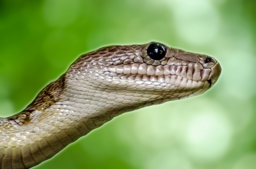

In [7]:
from fastdownload import download_url
dest = 'snake.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

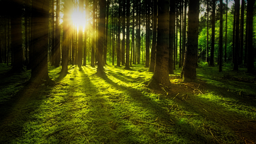

In [5]:
download_url(search_images('forest photos', max_images=1)[0], 'forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)

In [9]:
searches = 'forest','snake'
path = Path('snake_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(30)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(30)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(30)
    resize_images(path/o, max_size=400, dest=path/o)

/home/lukelo-tshakulongo/BaKoko/SC/Code/Mulandu/DLConcepts/venv/lib/python3.12/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/home/lukelo-tshakulongo/BaKoko/SC/Code/Mulandu/DLConcepts/venv/lib/python3.12/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/home/lukelo-tshakulongo/BaKoko/SC/Code/Mulandu/DLConcepts/venv/lib/python3.12/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/home/lukelo-tshakulongo/BaKoko/SC/Code/Mulandu/DLConcepts/venv/lib/python3.12/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/home/lukelo-tshakulongo/BaKoko/SC/Code/Mulandu/DLConcepts/venv/lib/python3.12/site-packages/PIL/Image.py:3570: UserWarn

# 2. Train the model

In [10]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

/home/lukelo-tshakulongo/BaKoko/SC/Code/Mulandu/DLConcepts/venv/lib/python3.12/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/home/lukelo-tshakulongo/BaKoko/SC/Code/Mulandu/DLConcepts/venv/lib/python3.12/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/home/lukelo-tshakulongo/BaKoko/SC/Code/Mulandu/DLConcepts/venv/lib/python3.12/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/home/lukelo-tshakulongo/BaKoko/SC/Code/Mulandu/DLConcepts/venv/lib/python3.12/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/home/lukelo-tshakulongo/BaKoko/SC/Code/Mulandu/DLConcepts/venv/lib/python3.12/site-packages/PIL/Image.py:3570: UserWarn

110

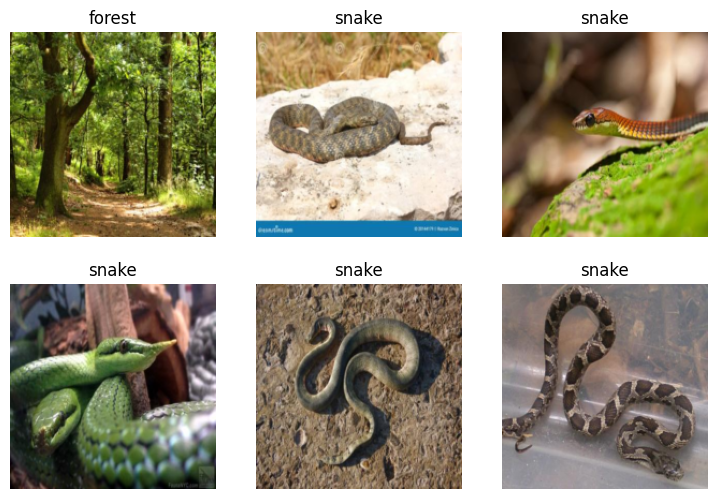

In [11]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [21]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,0.500101,0.156916,0.025510,00:08


epoch,train_loss,valid_loss,error_rate,time
0,0.119578,0.111793,0.022959,00:08
1,0.054354,0.080600,0.015306,00:06
2,0.031672,0.075482,0.015306,00:05
3,0.025068,0.060672,0.022959,00:05
4,0.018046,0.079489,0.012755,00:05
5,0.012591,0.047833,0.012755,00:05
6,0.008474,0.062488,0.017857,00:05
7,0.005860,0.062870,0.017857,00:05
8,0.004624,0.067779,0.017857,00:05
9,0.003214,0.065684,0.017857,00:05


# 3. Use the model

In [22]:

img = PILImage.create('snake.jpg')
is_snake,_,probs = learn.predict(img)
print(f"This is a: {is_snake}.")
print(f"Probability it's a snake: {probs[0]:.4f}\nProbability it's a forest image: {probs[1]:.4f}")

This is a: snake.
Probability it's a snake: 0.0000
Probability it's a forest image: 1.0000


<Axes: >

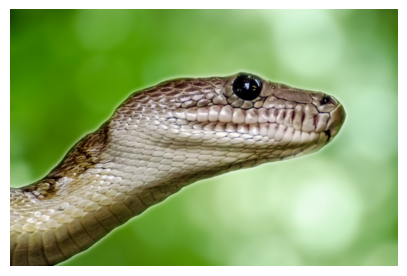

In [23]:
img.show()